## 一，项目背景  
Yelp是美国著名商户点评网站，创立于2004年，囊括各地餐馆、购物中心、酒店、旅游等领域的商户，用户可以在Yelp网站中给商户打分，提交评论，交流购物体验等。在Yelp中搜索一个餐厅或者旅馆，能看到它的简要介绍以及网友的点论，点评者还会给出多少星级的评价，通常点评者都是亲身体验过该商户服务的消费者，评论大多形象细致。  
2015 年，Yelp 举办了一场竞赛，要求参与者根据点评预测一家餐厅的评级。同年，Zhang, Zhao，和 Lecun（2015）将 1 星和 2 星评级转换为“消极”情绪类，将 3 星和 4 星评级转换为“积极”情绪类，从而简化了数据集。该数据集分为 56 万个训练样本和 3.8 万个测试样本。在这个数据集部分的其余部分中，我们将描述最小化清理数据并导出最终数据集的过程。然后，我们概述了利用 PyTorch 的数据集类的实现。  
这个数据集公开在：https://www.yelp.com/dataset/download   
现在有接近700万条数据。

Yelp评论数据分析，已经成为流行的NLP入门项目之一。   

## 二， 加载数据

Yelp目录下的yelp_academic_dataset_review.json文件里面有接近700万条评论记录。  
文件格式是json，内容是下面的形式：  
{"review_id":"KU_O5udG6zpxOg-VcAEodg","user_id":"mh_-eMZ6K5RLWhZyISBhwA","business_id":"XQfwVwDr-v0ZS3_CbbE5Xw","stars":3.0,"useful":0,"funny":0,"cool":0,"text":"If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.","date":"2018-07-07 22:09:11"},
{"review_id":"BiTunyQ73aT9WBnpR9DZGw","user_id":"OyoGAe7OKpv6SyGZT5g77Q","business_id":"7ATYjTIgM3jUlt4UM3IypQ","stars":5.0,"useful":1,"funny":0,"cool":1,"text":"I've taken a lot of spin classes over the years, and nothing compares to the classes at Body Cycle. From the nice, clean space and amazing bikes, to the welcoming and motivating instructors, every class is a top notch work out.\n\nFor anyone who struggles to fit workouts in, the online scheduling system makes it easy to plan ahead (and there's no need to line up way in advanced like many gyms make you do).\n\nThere is no way I can write this review without giving Russell, the owner of Body Cycle, a shout out. Russell's passion for fitness and cycling is so evident, as is his desire for all of his clients to succeed. He is always dropping in to classes to check in\/provide encouragement, and is open to ideas and recommendations from anyone. Russell always wears a smile on his face, even when he's kicking your butt in class!","date":"2012-01-03 15:28:18"},  
{"review_id":"saUsX_uimxRlCVr67Z4Jig","user_id":"8g_iMtfSiwikVnbP2etR0A","business_id":"YjUWPpI6HXG530lwP-fb2A","stars":3.0,"useful":0,"funny":0,"cool":0,"text":"Family diner. Had the buffet. Eclectic assortment: a large chicken leg, fried jalapeño, tamale, two rolled grape leaves, fresh melon. All good. Lots of Mexican choices there. Also has a menu with breakfast served all day long. Friendly, attentive staff. Good place for a casual relaxed meal with no expectations. Next to the Clarion Hotel.","date":"2014-02-05 20:30:30"}  

review.json文件截取了前60000条数据。在遇到一个非常大的数据集的时候，随机从中取一部分数据进行训练（不能太少，少了失去了代表性。也不能太多，太多达不到节省时间的目标），可以达到快速验证调整模型的目标。在小数据集上达到比较好的效果以后，再应用到大的数据集。   

Json2CSV.py实现了把json文件转化成为普通的csv文件的功能。

In [1]:
#导入处理数据包
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
#导入数据

#训练数据集, review-2.csv有60000行数据 使用encoding='utf-8'参数可以避免一些编码问题。也可以使用nrows参数读取前面的指定行数
train = pd.read_csv("./Yelp/review-2.csv",sep=',',header=0,encoding='utf-8') # nrows=nrows
print(train.head()) # head函数显示前5行数据

                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0    3.0       0      0     0   
1    5.0       1      0     1   
2    3.0       0      0     0   
3    5.0       1      0     1   
4    4.0       1      0     1   

                                                text                 date  
0  If you decide to eat here, just be aware it is...  2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year...  2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm...  2014-02-05 20:30:30  
3  Wow!  Yummy, different,  delici

In [2]:
print ('训练数据集:',train.shape)
print( train.info() )
print(train.describe())

训练数据集: (60000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_id    60000 non-null  object 
 1   user_id      60000 non-null  object 
 2   business_id  60000 non-null  object 
 3   stars        60000 non-null  float64
 4   useful       60000 non-null  int64  
 5   funny        60000 non-null  int64  
 6   cool         60000 non-null  int64  
 7   text         60000 non-null  object 
 8   date         60000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 4.1+ MB
None
              stars        useful         funny          cool
count  60000.000000  60000.000000  60000.000000  60000.000000
mean       3.844183      0.889267      0.254633      0.346167
std        1.353318      1.855953      1.026684      1.065640
min        1.000000      0.000000      0.000000      0.000000
25%        3.000000      0.000000  

可以看到，数据集一共有60000条数据。每条数据有9个参数。所有的数据没有缺失。用descripbe可以输出对于可统计的参数（数值型）的分布统计。  


In [3]:
count_stars=pd.value_counts(train['stars'],sort=True)
print("各个star的总数:")
print(count_stars)

各个star的总数:
5.0    26629
4.0    15236
3.0     6817
1.0     6525
2.0     4793
Name: stars, dtype: int64


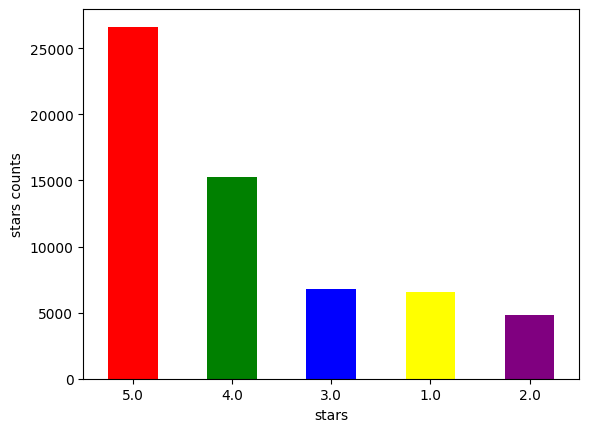

In [4]:
#绘图
plt.figure()

# 定义颜色列表，每个条形一个颜色
colors = ['red', 'green', 'blue', 'yellow', 'purple']

count_stars.plot(kind='bar',rot=0, color=colors)
plt.xlabel('stars')
plt.ylabel('stars counts')

plt.show()

可以用图表来显示数据，比较直观。

情感分类的总数:
1    48682
0    11318
dtype: int64


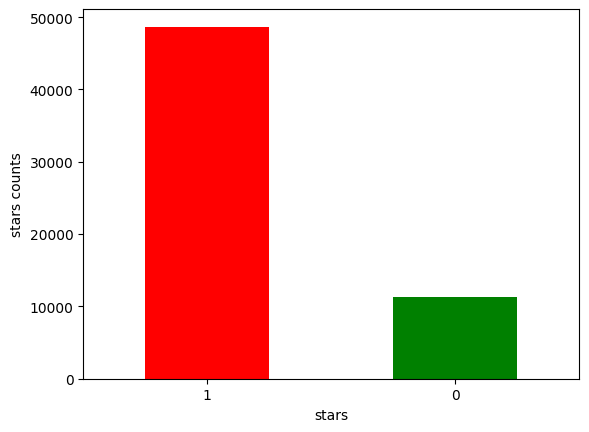

In [5]:
stars=list(train['stars'])

stars=[ 0 if star < 3 else 1 for star in stars ]

print("情感分类的总数:")
count_classes = pd.value_counts(stars, sort=True)
print(count_classes)

count_classes.plot(kind='bar',rot=0, color=colors)
plt.xlabel('stars')
plt.ylabel('stars counts')

plt.show()

In [6]:
#coding=utf-8
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.preprocessing import LabelEncoder
import np_utils

from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from scikeras.wrappers import KerasClassifier 
from sklearn.model_selection import KFold,StratifiedKFold

from tensorflow.keras import metrics

from sklearn.svm import SVC

from keras.layers import Embedding, LSTM

import tensorflow.keras.preprocessing.text as T
from tensorflow.keras.preprocessing.text import Tokenizer
from  tensorflow.keras.preprocessing.sequence import pad_sequences

import nltk
from nltk.corpus import stopwords
# from fastText import train_supervised
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import wordnet
import enchant

from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D

import matplotlib.pyplot as plt
from keras.utils import plot_model

print("加载成功")

加载成功


加载数据

In [7]:
#yelp评论文件路径 
# yelp_file="./Yelp/review.csv"  # 这个文件里面有接近700万条数据
yelp_file="./Yelp/review-2.csv"  # 这个文件里面有接近6万条数据

#词袋模型的最大特征束
max_features=5000

def load_reviews(filename,nrows):
    #CSV格式表头内容：
    # funny,user_id,review_id,text,business_id,stars,date,useful,cool
    text=[]
    stars=[]

    #https://www.cnblogs.com/datablog/p/6127000.html
    #sep : str, default ‘,’指定分隔符。如果不指定参数，则会尝试使用逗号分隔。分隔符长于一个字符并且不是‘\s+’,将使用python的语法分析器。
    # 并且忽略数据中的逗号。正则表达式例子：'\r\t'
    #header: int or list of ints, default ‘infer’
    # 指定行数用来作为列名，数据开始行数。如果文件中没有列名，设置为None。设置为0则认为第0行是列名
    #nrows : int, default None 需要读取的行数（从文件头开始算起）。
    #skiprows : list-like or integer, default None 需要忽略的行数（从文件开始处算起），或需要跳过的行号列表（从0开始）。
    #skip_blank_lines : boolean, default True如果为True，则跳过空行；否则记为NaN。

    ###
    #开发阶段读取前10000行 使用encoding='utf-8'参数非常重要
    df = pd.read_csv(filename,sep=',',header=0,encoding='utf-8',nrows=nrows)
    print(df.head())

    #按照列名直接获取数据 把 list转换成list对象
    text=list(df['text'])
    stars=list(df['stars'])

    #显示各个评分的个数
    print(df.describe())

    #绘图
    plt.figure()
    count_classes=pd.value_counts(df['stars'],sort=True)

    print("各个star的总数:")
    print(count_classes)
    count_classes.plot(kind='bar',rot=0)
    plt.xlabel('stars')
    plt.ylabel('stars counts')
    plt.savefig("yelp_stars.png")
    plt.show()
    
    return text,stars

                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0    3.0       0      0     0   
1    5.0       1      0     1   
2    3.0       0      0     0   
3    5.0       1      0     1   
4    4.0       1      0     1   

                                                text                 date  
0  If you decide to eat here, just be aware it is...  2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year...  2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm...  2014-02-05 20:30:30  
3  Wow!  Yummy, different,  delici

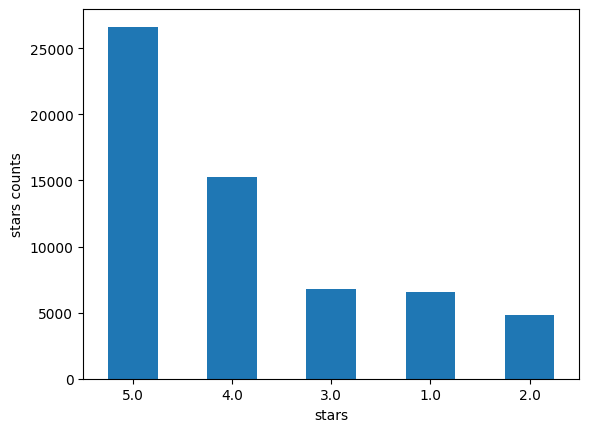

情感分类的总数:
1    48682
0    11318
dtype: int64


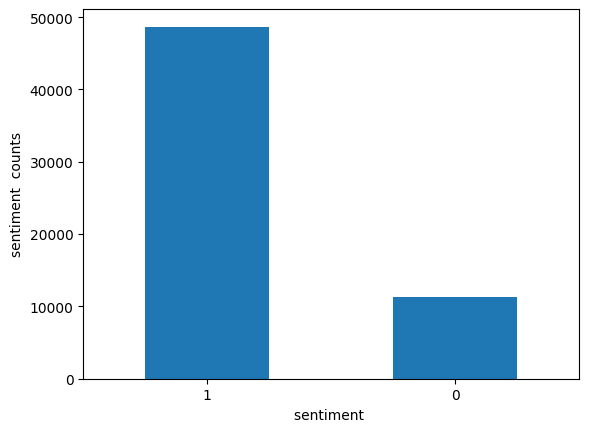

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Autin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Autin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


AttributeError: module 'enchant' has no attribute 'Dict'

In [9]:
# 使用SVM进行文档分类
def do_svm(text,stars):
    # 切割词袋 删除英文停用词
    #vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=max_features,stop_words='english',lowercase=True)
    vectorizer = CountVectorizer(ngram_range=(1, 1), max_features=max_features, stop_words='english', lowercase=True)
    #vectorizer = CountVectorizer(ngram_range=(1, 1), max_features=5000, stop_words=None, lowercase=True)

    print("vectorizer 参数:")
    print(vectorizer)
    # 该类会统计每个词语的tf-idf权值
    transformer = TfidfTransformer()
    # 使用2-gram和TFIDF处理
    x = transformer.fit_transform(vectorizer.fit_transform(text))
    #x = vectorizer.fit_transform(text)

    #二分类 标签直接实用stars
    y=stars

    clf = SVC()

    # 使用5折交叉验证
    scores = cross_val_score(clf, x, y, cv=5, scoring='f1_micro')
    # print scores
    print("f1_micro: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

#使用keras的MLP
def do_keras_mlp(text,stars):
    # 切割词袋 删除英文停用词
    #vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=max_features,stop_words='english',lowercase=True)
    vectorizer = CountVectorizer(ngram_range=(1, 1), max_features=max_features, stop_words='english', lowercase=True)
    #vectorizer = CountVectorizer(ngram_range=(1, 1), max_features=5000, stop_words=None, lowercase=True)

    print("vectorizer 参数:")
    print(vectorizer)
    # 该类会统计每个词语的tf-idf权值
    transformer = TfidfTransformer()
    # 使用2-gram和TFIDF处理
    #x = transformer.fit_transform(vectorizer.fit_transform(text))
    x = vectorizer.fit_transform(text)

    #我们可以使用从scikit-learn LabelEncoder类。
    # 这个类通过 fit() 函数获取整个数据集模型所需的编码,然后使用transform()函数应用编码来创建一个新的输出变量。
    encoder=LabelEncoder()
    encoder.fit(stars)
    encoded_y = encoder.transform(stars)

    #构造神经网络
    def baseline_model():
        model = Sequential()
        model.add(Dense(5, input_dim=max_features, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(2, activation='softmax'))
        # Compile model
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

        #可视化
        #plot_model(model, to_file='yelp-mlp-model.png',show_shapes=True)

        #model.summary()

        return model
    #在 scikit-learn 中使用 Keras 的模型,我们必须使用 KerasClassifier 进行包装。这个类起到创建并返回我们的神经网络模型的作用。
    # 它需要传入调用 fit()所需要的参数,比如迭代次数和批处理大小。
    # 最新接口指定训练的次数为epochs
    clf = KerasClassifier(build_fn=baseline_model, epochs=20, batch_size=128, verbose=1)

    #使用5折交叉验证
    scores = cross_val_score(clf, x, encoded_y, cv=5, scoring='f1_micro')
    # print scores
    print("f1_micro: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

    #scores = cross_val_score(clf, x, encoded_y, cv=5, scoring='accuracy')
    # print scores
    #print("accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


#使用keras的LSTM
def do_keras_lstm(text,stars):

    #转换成词袋序列
    max_document_length=200

    #删除通用词
    text_cleaned=[]
    nltk.download('stopwords')
    nltk.download('punkt')
    list_stopWords = list(set(stopwords.words('english')))
    english_punctuations = [',', '.', ':', ';', '?', '(', ')', '[', ']', '&', '!', '*', '@', '#', '$', '%']
    d = enchant.Dict()

    for line in text:

        # 分词
        list_words = word_tokenize(line.lower())
        # 去掉标点符号
        list_words = [word for word in list_words if word not in english_punctuations]
        # 实用wordnet删除非常见英文单词
        #list_words = [word for word in list_words if wordnet.synsets(word) ]
        list_words = [word for word in list_words if d.check(word)]
        # 过滤停止词
        filtered_words = [w for w in list_words if not w in list_stopWords]
        text_cleaned.append( " ".join(filtered_words) )


    text=text_cleaned

    #设置分词最大个数 即词袋的单词个数
    tokenizer = Tokenizer(num_words=max_features,lower=True)
    tokenizer.fit_on_texts(text)
    sequences = tokenizer.texts_to_sequences(text)

    x=pad_sequences(sequences, maxlen=max_document_length)


    #我们可以使用从scikit-learn LabelEncoder类。
    # 这个类通过 fit() 函数获取整个数据集模型所需的编码,然后使用transform()函数应用编码来创建一个新的输出变量。
    encoder=LabelEncoder()
    encoder.fit(stars)
    encoded_y = encoder.transform(stars)



    #构造神经网络
    def baseline_model():
        model = Sequential()
        model.add(Embedding(max_features, 128))
        model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
        model.add(Dense(2, activation='softmax'))

        # try using different optimizers and different optimizer configs
        model.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

        #可视化
        plot_model(model, to_file='yelp-lstm-model.png',show_shapes=True)

        model.summary()

        return model
    #在 scikit-learn 中使用 Keras 的模型,我们必须使用 KerasClassifier 进行包装。这个类起到创建并返回我们的神经网络模型的作用。
    # 它需要传入调用 fit()所需要的参数,比如迭代次数和批处理大小。
    # 最新接口指定训练的次数为epochs
    clf = KerasClassifier(build_fn=baseline_model, epochs=20, batch_size=128, verbose=0)

    #使用5折交叉验证
    scores = cross_val_score(clf, x, encoded_y, cv=5, scoring='f1_micro')
    # print scores
    print("f1_micro: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

    #scores = cross_val_score(clf, x, encoded_y, cv=5, scoring='accuracy')
    # print scores
    #print("accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


def dump_file(x,y,filename):
    with open(filename, 'w') as f:
        for i,v in enumerate(x):
            line="%s __label__%d\n" % (v,y[i])
            f.write(line)
        f.close()

def do_fasttext(text,stars):
    #删除通用词
    text_cleaned=[]

    list_stopWords = list(set(stopwords.words('english')))
    english_punctuations = [',', '.', ':', ';', '?', '(', ')', '[', ']', '&', '!', '*', '@', '#', '$', '%']
    d = enchant.Dict("en_US")

    for line in text:

        # 分词
        list_words = word_tokenize(line.lower())
        # 去掉标点符号
        list_words = [word for word in list_words if word not in english_punctuations]
        # 实用wordnet删除非常见英文单词
        #list_words = [word for word in list_words if wordnet.synsets(word) ]
        list_words = [word for word in list_words if d.check(word)]
        # 过滤停止词
        filtered_words = [w for w in list_words if not w in list_stopWords]
        text_cleaned.append( " ".join(filtered_words) )

    # 分割训练集和测试集 测试集占20%
    #x_train, x_test, y_train, y_test = train_test_split(text, stars, test_size=0.2)
    x_train, x_test, y_train, y_test = train_test_split(text_cleaned, stars, test_size=0.2)

    # 按照fasttest的要求生成训练数据和测试数据
    dump_file(x_train, y_train, "yelp_train.txt")
    dump_file(x_test, y_test, "yelp_test.txt")

    model = train_supervised(
        input="yelp_train.txt", epoch=20, lr=0.6, wordNgrams=2, verbose=2, minCount=1
    )

    def print_results(N, p, r):
        print("N\t" + str(N))
        print("P@{}\t{:.3f}".format(1, p))
        print("R@{}\t{:.3f}".format(1, r))

    print_results(*model.test("yelp_test.txt"))


#使用keras的cnn
def do_keras_cnn(text,stars):

    #转换成词袋序列
    max_document_length=200

    #删除通用词
    text_cleaned=[]

    list_stopWords = list(set(stopwords.words('english')))
    english_punctuations = [',', '.', ':', ';', '?', '(', ')', '[', ']', '&', '!', '*', '@', '#', '$', '%']
    d = enchant.Dict("en_US")

    #for line in text:

        # 分词
    #    list_words = word_tokenize(line.lower())
        # 去掉标点符号
    #    list_words = [word for word in list_words if word not in english_punctuations]
        # 实用wordnet删除非常见英文单词
        #list_words = [word for word in list_words if wordnet.synsets(word) ]
    #    list_words = [word for word in list_words if d.check(word)]
        # 过滤停止词
     #   filtered_words = [w for w in list_words if not w in list_stopWords]
     #   text_cleaned.append( " ".join(filtered_words) )


    #text=text_cleaned

    #设置分词最大个数 即词袋的单词个数
    tokenizer = Tokenizer(num_words=max_features,lower=True)
    tokenizer.fit_on_texts(text)
    sequences = tokenizer.texts_to_sequences(text)

    x=pad_sequences(sequences, maxlen=max_document_length)


    #我们可以使用从scikit-learn LabelEncoder类。
    # 这个类通过 fit() 函数获取整个数据集模型所需的编码,然后使用transform()函数应用编码来创建一个新的输出变量。
    encoder=LabelEncoder()
    encoder.fit(stars)
    encoded_y = encoder.transform(stars)



    #构造神经网络
    def baseline_model():

        #CNN参数
        embedding_dims = 50
        filters = 250
        kernel_size = 3
        hidden_dims = 250

        model = Sequential()
        model.add(Embedding(max_features, embedding_dims))

        model.add(Conv1D(filters,
                         kernel_size,
                         padding='valid',
                         activation='relu',
                         strides=1))
        #池化
        model.add(GlobalMaxPooling1D())

        model.add(Dense(2, activation='softmax'))

        model.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

        #可视化
        plot_model(model, to_file='yelp-cnn-model.png',show_shapes=True)

        model.summary()

        return model
    #在 scikit-learn 中使用 Keras 的模型,我们必须使用 KerasClassifier 进行包装。这个类起到创建并返回我们的神经网络模型的作用。
    # 它需要传入调用 fit()所需要的参数,比如迭代次数和批处理大小。
    # 最新接口指定训练的次数为epochs
    clf = KerasClassifier(build_fn=baseline_model, epochs=10, batch_size=128, verbose=1)

    #使用5折交叉验证
    scores = cross_val_score(clf, x, encoded_y, cv=5, scoring='f1_micro')
    # print scores
    print("f1_micro: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

    #scores = cross_val_score(clf, x, encoded_y, cv=5, scoring='accuracy')
    # print scores
    #print("accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


if __name__ == '__main__':


    text,stars=load_reviews(yelp_file,100000)

    stars=[ 0 if star < 3 else 1 for star in stars ]

    print("情感分类的总数:")
    count_classes = pd.value_counts(stars, sort=True)
    print(count_classes)
    
    count_classes.plot(kind='bar',rot=0)
    plt.xlabel('sentiment ')
    plt.ylabel('sentiment  counts')
    plt.savefig("yelp_sentiment_stars.png")
    plt.show()
    

    #使用MLP文档分类
    #do_keras_mlp(text,stars)
    #使用lstm文档分类
    do_keras_lstm(text,stars)
    #使用SVM文档分类
    #do_svm(text,stars)
    #使用fasttext文档分类
    #do_fasttext(text,stars)

    #使用cnn文档分类
    #do_keras_cnn(text,stars)